<a href="https://colab.research.google.com/github/Enriquea017/Actividad-5-Extracci-n-de-Caracter-sticas-/blob/main/Actividad5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Carga de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Carga de la base de datos
df = pd.read_csv('Hawaii_limpio4.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df.shape

(36125, 50)

In [39]:
df.head()

,precio,ganancia_estimada_365,alojados,baños,recámaras,camas,prom_min_noches,prom_max_noches,num_reviews,ly_reviews,ocupación_estimada_365,ID,nombre,ID_host,host_nombre,host_desde,descripción,tiempo_respuesta,tasa_respuesta,tasa_aceptación_host,superhost,host_vecindario,host_listados,host_contacto,host_foto_perfil,host_identidad_verif,vecindario,grupo_vecindario,tipo_propiedad,tipo_habitación,amenidades,min_noches,max_noches,min_min_noches,max_max_noches,disponibilidad_30,disponibilidad_60,disponibilidad_90,disponibilidad_365,primer_review,calificación_general,cal_precisión,cal_limpieza,cal_check-in,cal_comunicación,cal_ubicación,cal_valor,agendado_instante,reviews_mes,licencia
0,128.0,4608.000000,2.0,1.0,1.0,1.0,3.0,1125.0,40.0,6.0,36,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,2009-02-09,"The 'Auwai Suite is a lovely, self-contained a...",within an hour,100.0,96.0,t,Island of Hawaiʻi,6.0,"['email', 'phone']",t,t,South Kohala,Hawaii,Entire rental unit,Entire home/apt,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",3,1125,3,1125,8,8,8,8,2011-05-31,4.78,4.88,4.55,4.95,4.85,5.00,4.85,f,0,119-269-5808-01R
1,97.0,12610.000000,2.0,1.0,0.0,2.0,5.0,1125.0,231.0,14.0,130,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,2009-02-13,This Wonderful Spacious Studio apt/flat is in ...,within an hour,100.0,96.0,f,Kailua/Kona,3.0,"['email', 'phone']",t,t,South Kona,Hawaii,Entire rental unit,Entire home/apt,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",5,60,5,1125,2,22,48,250,2010-02-16,4.67,4.69,4.42,4.85,4.88,4.74,4.78,t,1,TA-163-133-0304-01
2,117.0,0.000000,2.0,1.0,1.0,1.0,2.0,60.0,0.0,0.0,0,5480,Isle Of You Naturally Farm Retreat,8145,Normand,2009-02-18,The Best Choice for your Clothing Optional Nud...,Sin respuesta,0.0,0.0,f,Island of Hawaiʻi,3.0,"['email', 'phone']",t,f,Puna,Hawaii,Private room in cabin,Private room,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",2,60,2,60,30,60,90,365,2009-02-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0,Sin licencia
3,803.5,4719.909091,4.0,2.0,2.0,3.0,7.0,730.0,0.0,0.0,0,5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,8279,Sarada,2009-02-20,This split-level condo is right across the str...,Sin respuesta,0.0,0.0,f,No especificado,3.0,"['email', 'phone', 'work_email']",t,f,North Shore Oahu,Honolulu,Entire home/apt,Entire home/apt,"[""Coffee maker"", ""Freezer"", ""Hair dryer"", ""Bat...",7,730,7,730,0,0,0,0,2009-02-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0,Sin licencia
4,98.0,0.000000,4.0,0.0,1.0,1.0,1.0,1125.0,128.0,0.0,0,7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,22083,Steven,2009-06-17,We offer a medium term rental requiring a mini...,within a day,100.0,0.0,f,Island of Hawaiʻi,4.0,"['email', 'phone']",t,t,Puna,Hawaii,Entire home,Entire home/apt,"[""Free washer \u2013 In building"", ""Free carpo...",1,1125,1,1125,30,60,90,269,2010-07-12,4.65,4.65,4.70,4.79,4.76,4.25,4.60,f,0,GE-104-390-7584-01


In [40]:
#Revisión de nulos
df.isnull().sum()

,0
precio,0
ganancia_estimada_365,0
alojados,0
baños,0
recámaras,0
camas,0
prom_min_noches,0
prom_max_noches,0
num_reviews,0
ly_reviews,0


In [41]:
df.columns

Index(['precio', 'ganancia_estimada_365', 'alojados', 'baños', 'recámaras',
       'camas', 'prom_min_noches', 'prom_max_noches', 'num_reviews',
       'ly_reviews', 'ocupación_estimada_365', 'ID', 'nombre', 'ID_host',
       'host_nombre', 'host_desde', 'descripción', 'tiempo_respuesta',
       'tasa_respuesta', 'tasa_aceptación_host', 'superhost',
       'host_vecindario', 'host_listados', 'host_contacto', 'host_foto_perfil',
       'host_identidad_verif', 'vecindario', 'grupo_vecindario',
       'tipo_propiedad', 'tipo_habitación', 'amenidades', 'min_noches',
       'max_noches', 'min_min_noches', 'max_max_noches', 'disponibilidad_30',
       'disponibilidad_60', 'disponibilidad_90', 'disponibilidad_365',
       'primer_review', 'calificación_general', 'cal_precisión',
       'cal_limpieza', 'cal_check-in', 'cal_comunicación', 'cal_ubicación',
       'cal_valor', 'agendado_instante', 'reviews_mes', 'licencia'],
      dtype='object')

# Gráficas de análisis de variables categóricas

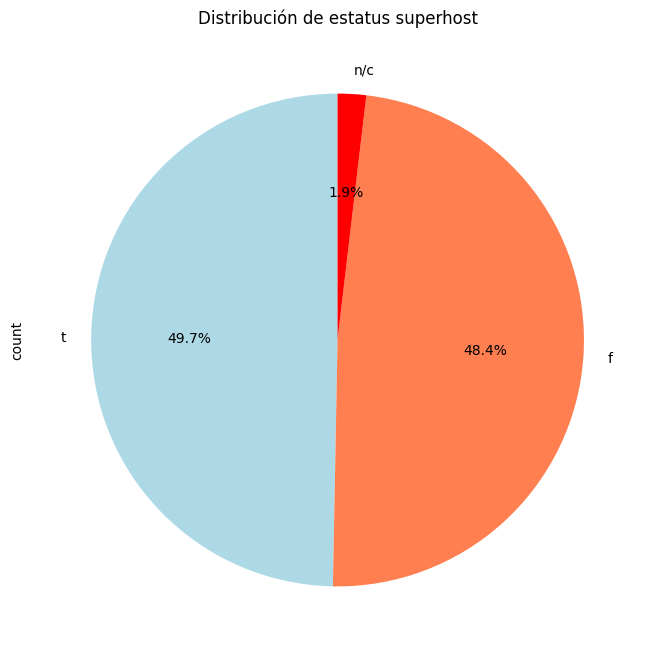

In [83]:
#Gráfico de pay de Superhost
superhost_cuenta = df['superhost'].value_counts()
plt.figure(figsize=(8, 8))
superhost_cuenta.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'coral','red'])
plt.title('Distribución de estatus superhost')
plt.show()

La categoría n/c que se refiere a una falta de respuesta, la podemos incluir también con los hosts NO considerados superhost, por lo que podemos concluir que la distribución es muy similar, siendo los superhost ligeramente menos en cantidad.

In [70]:
df['licencia'].unique()

array(['119-269-5808-01R', 'TA-163-133-0304-01', 'Sin licencia', ...,
       'STVR-19-375600', '440080020171, TA-102-930-9952-01',
       '440080020167, TA-188-544-4096-01'], dtype=object)

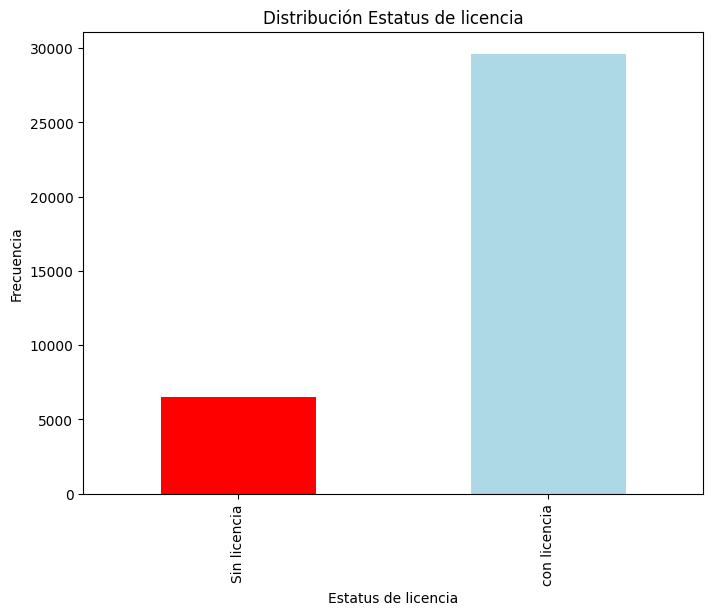

In [82]:
#Gráfico de barras de estatus de licencia
df['licencia_categoria'] = np.where(df['licencia'] == 'Sin licencia', 'Sin licencia', 'con licencia')
licencia_cuenta = df['licencia_categoria'].value_counts()

plt.figure(figsize=(8, 6))
licencia_cuenta.sort_index().plot(kind='bar', color=['red', 'lightblue'])
plt.title('Distribución Estatus de licencia')
plt.xlabel('Estatus de licencia')
plt.ylabel('Frecuencia')
plt.show()

En el gráfico de barras se puede ver que aproximadamente el 16% de los host en Hawaii no cuentan con licencia, siendo la gran mayoría acreedora de una licencia.

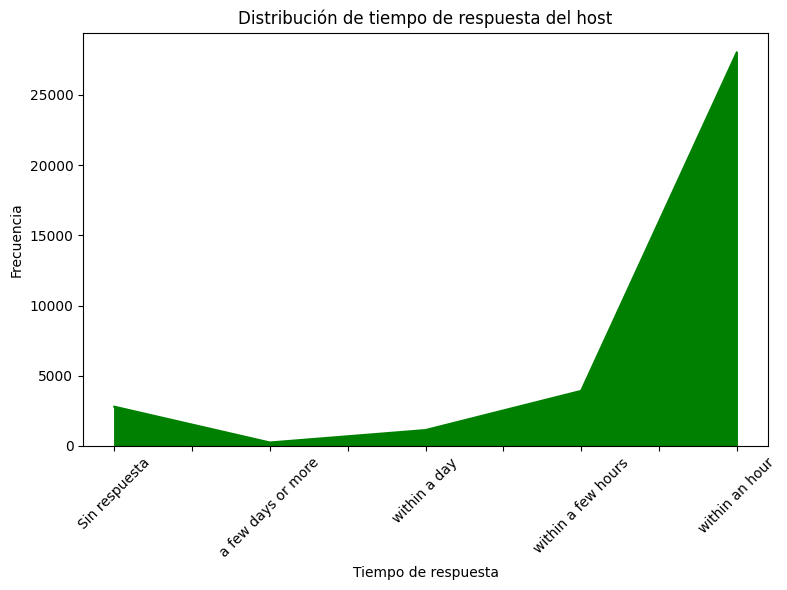

In [81]:
#Gráfico de 'area para tiempo de respuesta del host
tiempo_respuesta_cuenta = df['tiempo_respuesta'].value_counts()

plt.figure(figsize=(8, 6))
tiempo_respuesta_cuenta.sort_index().plot(kind='area', color='green')
plt.title('Distribución de tiempo de respuesta del host')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De acuerdo al gráfico, la gran mayoría de hosts responden dentro de una hora.

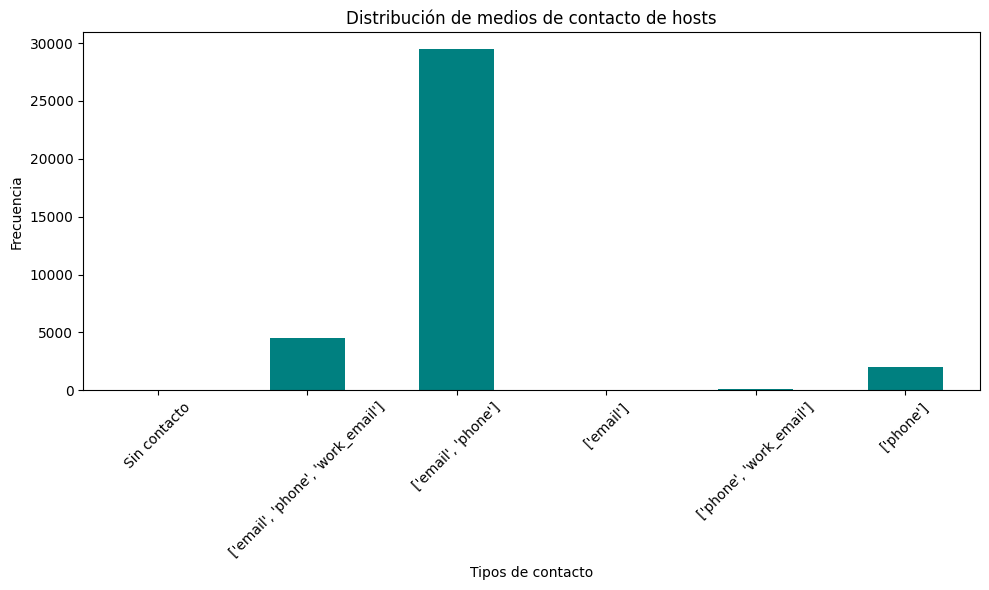

In [84]:
#Gráfico de barras para medios de contacto de los hosts
host_contacto_cuenta = df['host_contacto'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
host_contacto_cuenta.sort_index().plot(kind='bar', color='teal')
plt.title('Distribución de medios de contacto de hosts')
plt.xlabel('Tipos de contacto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los medio de contacto que más usan los hosts son teléfono y email, en cambio, los hosts que usan work email o solo email son minoría.

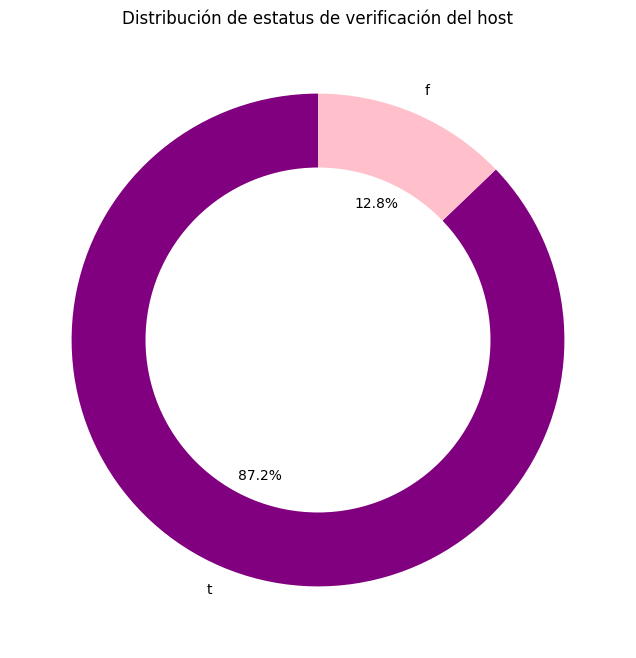

In [88]:
#Gráfico de dona para estatus de verificación del host
host_identidad_cuenta = df['host_identidad_verif'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(host_identidad_cuenta, labels=host_identidad_cuenta.index, autopct='%1.1f%%', startangle=90, colors=['purple', 'pink'])

#Codigo para dar forma de dona
circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Distribución de estatus de verificación del host')
plt.show()

Aproximadamente el 87% de los hosts tienen la identidad verificada

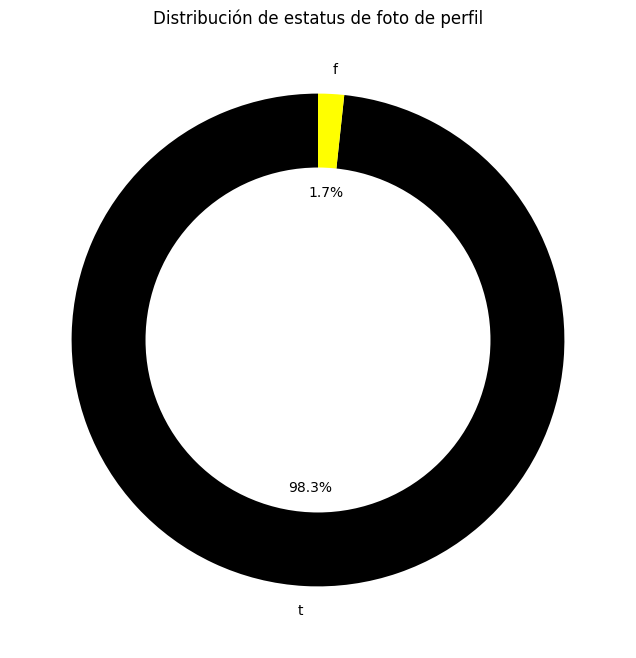

In [89]:
#Distribución de estatus de foto de perfil
host_foto_cuenta = df['host_foto_perfil'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(host_foto_cuenta, labels=host_foto_cuenta.index, autopct='%1.1f%%', startangle=90, colors=['black', 'yellow'])

circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Distribución de estatus de foto de perfil')
plt.show()

De acuerdo a la gráfica podemos observar que prácticamente todos los hosts cuentan con una foto de perfil, solo poco menos del 2% no cuentan con foto de perfil.

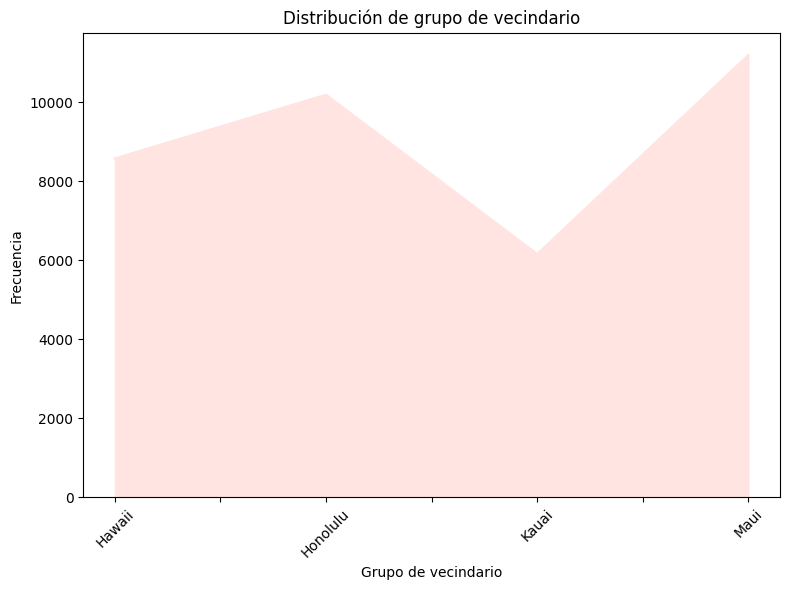

In [91]:
#Gráfico de área para grupo de vecindario
grupo_vecindario_cuenta = df['grupo_vecindario'].value_counts()

# Create an area plot
plt.figure(figsize=(8, 6))
grupo_vecindario_cuenta.sort_index().plot(kind='area', color='mistyrose') # Using a color palette
plt.title('Distribución de grupo de vecindario')
plt.xlabel('Grupo de vecindario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que las localidades donde más listas de airbnb hay es en Honolulu, Maui, Hawaii y Kauai, en este respectivo orden.

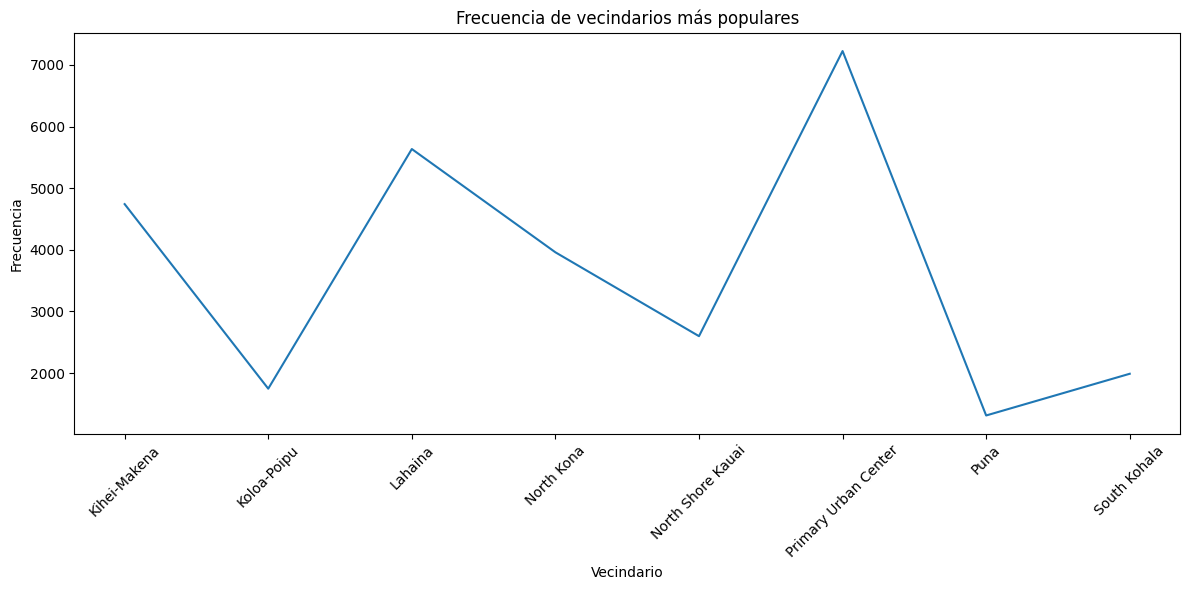

In [96]:
#Gráfico de líneas para vecindarios con más de 1000 observaciones
vecindario_cuenta = df['vecindario'].value_counts()

vecindarios_filtro = vecindario_cuenta[vecindario_cuenta > 1000]

plt.figure(figsize=(12, 6))
vecindarios_filtro.sort_index().plot(kind='line')
plt.title('Frecuencia de vecindarios más populares')
plt.xlabel('Vecindario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se muestran los vecindarios con más de 1000 observaciones, es decir, los más populares, entre estos, destaca más Lahaina y el centro de la ciudad.

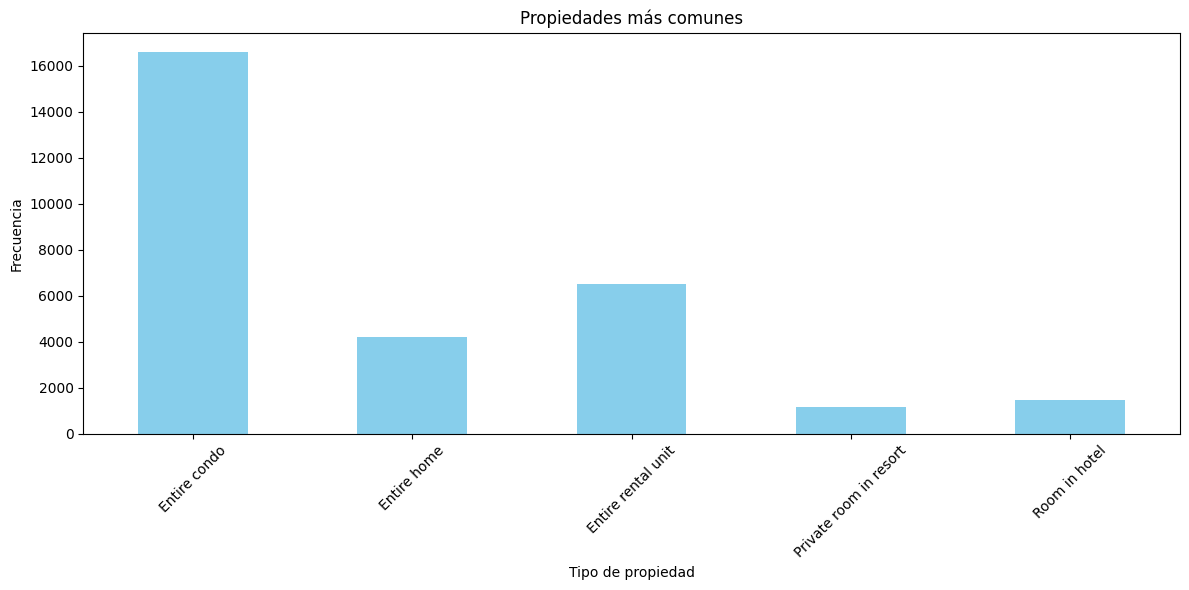

In [97]:
# Gráfico de barras de tipo de propiedad
tipo_propiedad_cuenta = df['tipo_propiedad'].value_counts()

tipo_propiedad_filtro = tipo_propiedad_cuenta[tipo_propiedad_cuenta > 1000]

# Create a bar plot from the filtered frequency counts
plt.figure(figsize=(12, 6))
tipo_propiedad_filtro.sort_index().plot(kind='bar', color='skyblue')
plt.title('Propiedades más comunes')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las propiedades más comunes ofrecidas en airbnb de Hawaii son condominios y unidades completas para rentar.

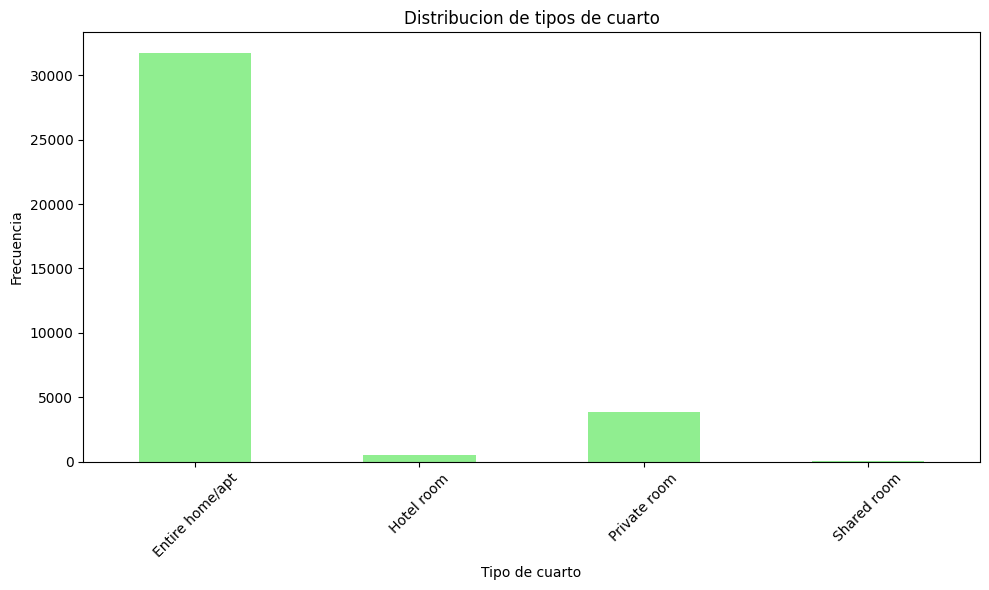

In [98]:
# Gráfico de barras para tipo de habitación
tipo_habitacion_cuenta = df['tipo_habitación'].value_counts()

plt.figure(figsize=(10, 6))
tipo_habitacion_cuenta.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribucion de tipos de cuarto')
plt.xlabel('Tipo de cuarto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En cuanto a los tipos de cuarto, los más comúnes con diferencia son casas o departamentos enteros.

# *Categorización de variables*

In [100]:
#Contamos
df['tasa_respuesta'].info()
n_tasa_respuesta = 36125

<class 'pandas.core.series.Series'>
RangeIndex: 36125 entries, 0 to 36124
Series name: tasa_respuesta
Non-Null Count  Dtype  
--------------  -----  
36125 non-null  float64
dtypes: float64(1)
memory usage: 282.4 KB


In [101]:
#Limites tasa_respuesta
max1 = df['tasa_respuesta'].max()
min1 = df['tasa_respuesta'].min()
limites1 = (min1, max1)
limites1

(0.0, 100.0)

In [102]:
#Rango tasa respuesta
rango1 = max1 - min1
rango1

100.0

In [103]:
#Intervalos de clase "ni"
ni1 = 1+3.32*np.log10(n_tasa_respuesta)
ni1

np.float64(16.131922081138484)

In [104]:
#Ancho de intervalos
i1 = rango1/ni1
i1
#Redondeamos a 6 intervalos

np.float64(6.19888935100427)

In [105]:
#Categorización
intervalos1 = np.linspace((min1-0.001), (max1+0.001), 6)
intervalos1

array([ -0.001 ,  19.9994,  39.9998,  60.0002,  80.0006, 100.001 ])

In [106]:
categorias1 = ['Respuesta nula/casi nula', 'Respuesta muy baja',
               'Respuesta baja', 'Respuesta media', 'Respuesta alta']

In [107]:
df['tasa_respuesta'] = pd.cut(x = df['tasa_respuesta'],
                              bins=intervalos1, labels=categorias1)
df['tasa_respuesta']

,tasa_respuesta
0,Respuesta alta
1,Respuesta alta
2,Respuesta nula/casi nula
3,Respuesta nula/casi nula
4,Respuesta alta
...,...
36120,Respuesta alta
36121,Respuesta alta
36122,Respuesta alta
36123,Respuesta alta


In [108]:
# Tabla de frecuencias
tabla_tasa_respuesta = df['tasa_respuesta'].value_counts().sort_index()
display(tabla_tasa_respuesta)

,count
tasa_respuesta,
Respuesta nula/casi nula,2982
Respuesta muy baja,40
Respuesta baja,127
Respuesta media,606
Respuesta alta,32370


Text(0, 0.5, 'Frecuencia')

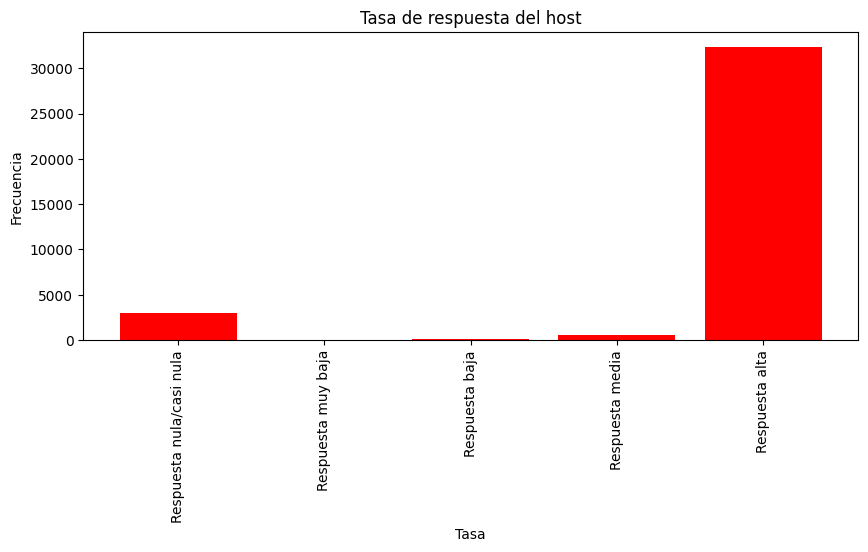

In [109]:
#Gráfica de tasa respuesta
tabla_tasa_respuesta.plot(kind='bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Tasa de respuesta del host')
plt.xlabel('Tasa')
plt.ylabel('Frecuencia')

En tasa de respuesta de los hosts, la gran mayoría tiene un porcentaje alto, mientras que otro pequeño porcentaje tiene un estatus de poca respuesta o nula.

# Categorización Host_acceptance rate

In [110]:
#Categorización host_acceptance_rate
#Utilizamos 36125 como el numero total de observaciones para todas las variables
n_observaciones = 36125
#Limites
max2 = df['tasa_aceptación_host'].max()
min2 = df['tasa_aceptación_host'].min()
limites2 = (min2, max2)
#Rango
rango2 = max2 - min2
#Intervalos de clase "ni"
ni2 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i2 = rango2/ni2
i2_redondeado = round(i2, 0)
#Categorización
intervalos2 = np.linspace((min2-0.001), (max2+0.001), int(i2_redondeado))
print(ni2)
print(i2)
print(i2_redondeado)
print(intervalos2)


16.131922081138484
6.19888935100427
6.0
[ -0.001   19.9994  39.9998  60.0002  80.0006 100.001 ]


In [111]:
#Set categorias
categorias2 = ['Aceptación nula/casi nula', 'Aceptación muy baja',
               'Aceptación baja', 'Aceptación media', 'Aceptación alta']
#Creación de la categoría
df['tasa_aceptación_host'] = pd.cut(x = df['tasa_aceptación_host'],
                              bins=intervalos2, labels=categorias2)
df['tasa_aceptación_host']

,tasa_aceptación_host
0,Aceptación alta
1,Aceptación alta
2,Aceptación nula/casi nula
3,Aceptación nula/casi nula
4,Aceptación nula/casi nula
...,...
36120,Aceptación alta
36121,Aceptación alta
36122,Aceptación nula/casi nula
36123,Aceptación alta


In [112]:
# Tabla de frecuencias
tabla2 = df['tasa_aceptación_host'].value_counts().sort_index()
display(tabla2)

,count
tasa_aceptación_host,
Aceptación nula/casi nula,3517
Aceptación muy baja,822
Aceptación baja,1964
Aceptación media,2300
Aceptación alta,27522


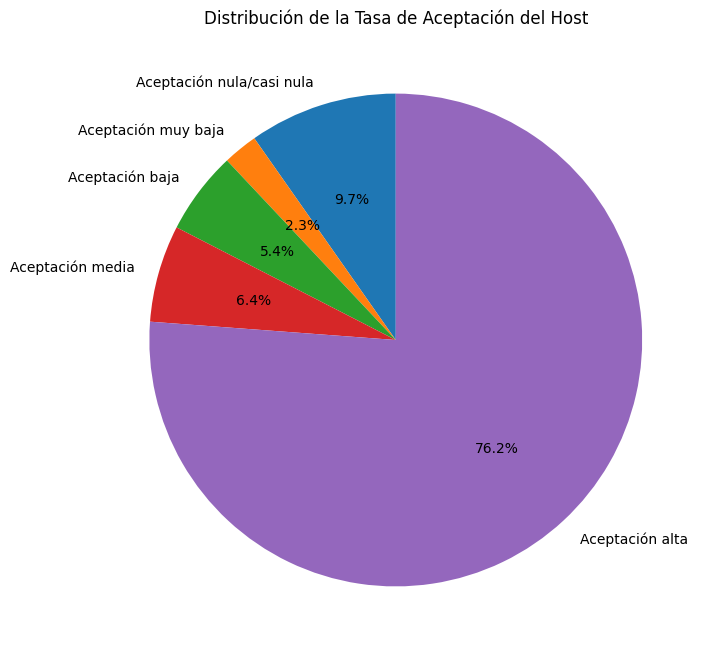

In [113]:
#Gráfica de pastel de tasa de aceptación del host
tabla2.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribución de la Tasa de Aceptación del Host')
plt.ylabel('')
plt.show()

Tres cuartas partes de los hosts tienen una aceptación alta, mientras que con casi 20% de participación, la aceptación va de baja hasta nula, siendo este porcentaje muy alto y un indicador a tomar en cuenta.

#Categorización accommodates




In [121]:
#Limites
max4 = df['alojados'].max()+1
min4 = df['alojados'].min()-1
limites4 = (min4, max4)
#Rango
rango4 = max4 - min4
#Intervalos de clase "ni"
ni4 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i4 = rango4/ni4
i4_redondeado = round(i4, 0)
print(limites4)
print(ni4)
print(i4)
print(i4_redondeado)


(0.0, 12.0)
16.131922081138484
0.7438667221205125
1.0


In [122]:
#Categorización, Sturges recomendó 1 intervalo, esto es debido a la gran cantidad de observaciones, pero para el contexto de
#la variable, lo haremos manualmente y se pondrán 4 intervalos
intervalos4 = np.linspace(min4, max4, 5)
intervalos4
#Set categorias
categorias4 = ['3 o menos', 'Familiar (3-6)','Familia grande(6-9)', 'Grupo grabde']

In [123]:
#Creación de la categoría
df['alojados'] = pd.cut(x = df['alojados'],
                              bins=intervalos4, labels=categorias4)
df['alojados']

,alojados
0,3 o menos
1,3 o menos
2,3 o menos
3,Familiar (3-6)
4,Familiar (3-6)
...,...
36120,Familiar (3-6)
36121,Familiar (3-6)
36122,3 o menos
36123,3 o menos


In [124]:
# Tabla de frecuencias
tabla4 = df['alojados'].value_counts().sort_index()
display(tabla4)

,count
alojados,
3 o menos,8689
Familiar (3-6),23402
Familia grande(6-9),3316
Grupo grabde,718


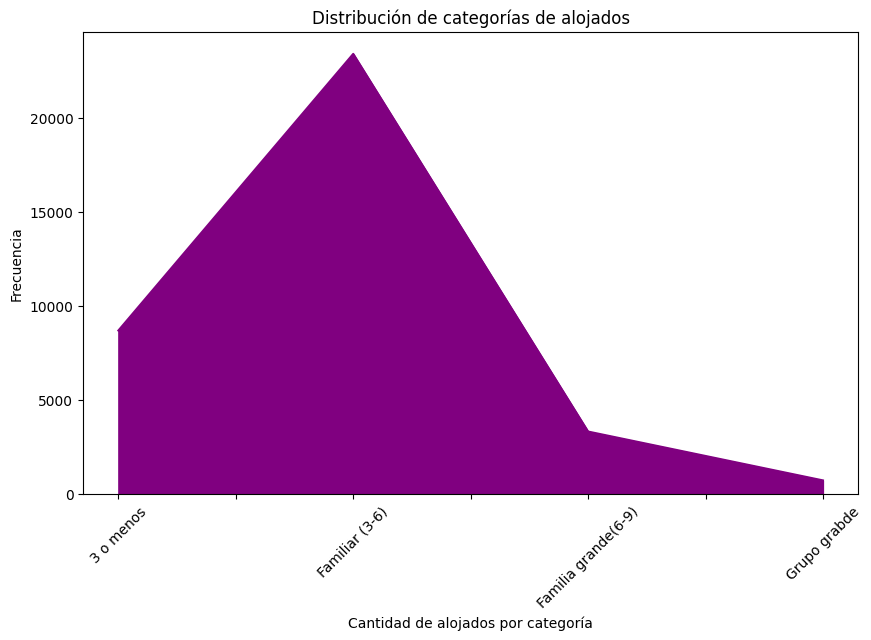

In [127]:

plt.figure(figsize=(10, 6))
tabla4.plot(kind='area', color='purple')
plt.title('Distribución de categorías de alojados')
plt.xlabel('Cantidad de alojados por categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

De acuerdo a la gráfica, la mayoría de listados en Airbnb son para familias o grupos de 3 a 6 personas o de grupos menores a 3 personas, por otro lado, una proporción pequeña de propiedades son para familias o grupos grandes de más de 6 personas.

# bathrooms_text

In [128]:
#Limites
max5 = df['baños'].max()
min5 = df['baños'].min()
limites5 = (min5, max5)
#Rango
rango5 = max5 - min5
#Intervalos de clase "ni"
ni5 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i5 = rango5/ni5
print(limites5)
print(ni5)
print(i5)

(0.0, 4.0)
16.131922081138484
0.24795557404017082


In [129]:
#Categorización, categorizar en 0.25 cada intervalo divide valores enteros,
#optamos por 3 intervalos
intervalos5 = np.linspace((min5-0.001), (max5+0.001), 3)
#Set categorias
categorias5 = ['Menos de 2 baños', '2 baños o más']

print(intervalos5.round(0))

[-0.  2.  4.]


In [130]:
#Creación de la categoría
df['baños'] = pd.cut(x = df['baños'],
                              bins=intervalos5, labels=categorias5)
df['baños']

,baños
0,Menos de 2 baños
1,Menos de 2 baños
2,Menos de 2 baños
3,Menos de 2 baños
4,Menos de 2 baños
...,...
36120,Menos de 2 baños
36121,Menos de 2 baños
36122,Menos de 2 baños
36123,Menos de 2 baños


In [131]:
# Tabla de frecuencias
tabla5 = df['baños'].value_counts().sort_index()
display(tabla5)

,count
baños,
Menos de 2 baños,33298
2 baños o más,2827


Text(0.5, 1.0, 'Distribución de baños por categoría')

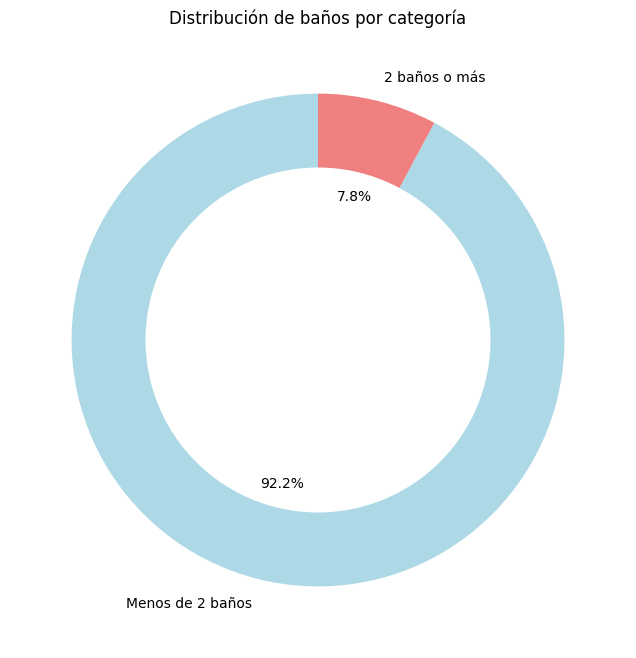

In [133]:

plt.figure(figsize=(8, 8))
plt.pie(tabla5, labels=tabla5.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

circulo= plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title('Distribución de baños por categoría')

Solo el 7.8% de propiedades cuentan con 2 baños o más, por lo que es muy improbable encontrar una propiedad con estas características. El 92.2% tiene 1 baño o ninguno.

# beds

In [134]:
#Limites
max6 = df['camas'].max()
min6 = df['camas'].min()
limites6 = (min6, max6)
#Rango
rango6 = max6 - min6
#Intervalos de clase "ni"
ni6 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i6 = rango6/ni6
print(limites6)
print(ni6)
print(i6)

(0.0, 6.0)
16.131922081138484
0.37193336106025626


In [135]:
#Categorización, mismo caso que con camas, optamos por menos intervalos que
#los recomendados
intervalos6 = np.linspace((min6-0.001), (max6+0.001), 4)
intervalos6
#Set categorias
categorias6 = ['Menos de 2 camas', '2-3 camas', '4-6 camas']
print(intervalos6.round(0))

[-0.  2.  4.  6.]


In [136]:
#Creación de la categoría
df['camas'] = pd.cut(x = df['camas'],
                              bins=intervalos6, labels=categorias6)
df['camas']

,camas
0,Menos de 2 camas
1,2-3 camas
2,Menos de 2 camas
3,2-3 camas
4,Menos de 2 camas
...,...
36120,Menos de 2 camas
36121,2-3 camas
36122,2-3 camas
36123,Menos de 2 camas


In [137]:
# Tabla de frecuencias
tabla6 = df['camas'].value_counts().sort_index()
display(tabla6)

,count
camas,
Menos de 2 camas,7843
2-3 camas,26438
4-6 camas,1844


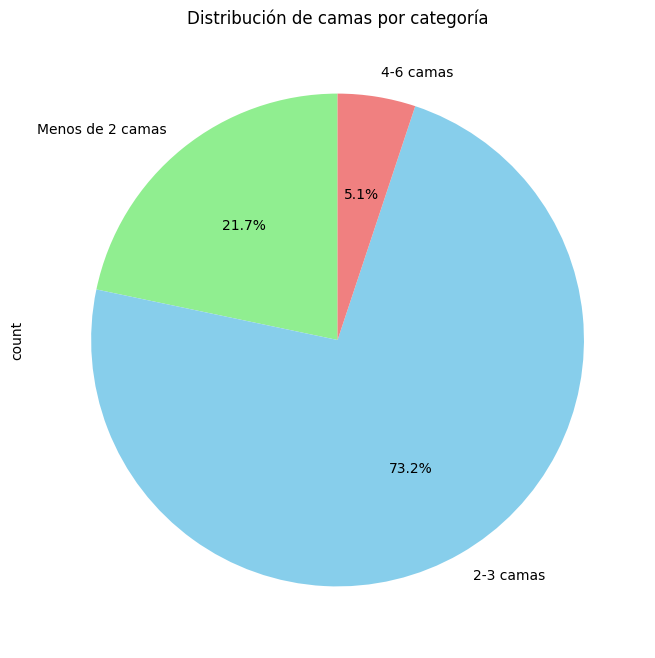

In [139]:

plt.figure(figsize=(8, 8))
tabla6.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'skyblue', 'lightcoral'])
plt.title('Distribución de camas por categoría')
plt.show()

La mayoría de propiedades cuentan con 2 o 3 camas

# price

In [140]:
#Limites
max7 = df['precio'].max()
min7 = df['precio'].min()
limites7 = (min7, max7)
#Rango
rango7 = max7 - min7
#Intervalos de clase "ni"
ni7 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i7 = rango7/ni7
print(limites7)
print(rango7)
print(ni7)
print(i7)

(1.0, 3335.0)
3334.0
16.131922081138484
206.6709709624824


In [141]:
#Categorización, en este caso, intervalos con ancho de
#206 puede ser poco para un rango de 3334 de precio, por lo que optamos por hacer
#menos intervalos
intervalos7 = np.linspace((min7-0.001), (max7+0.001), 10)
#Set categorias
categorias7 = ['1-371', '371-742', '742-1112', '1113-1483', '1484-1853', '1854-2224', '2225-2594', '2595-2965', '2966-3335']


#Agregamos codigo para visualizar los valores redondeados
r7 = np.array(intervalos7)
rr7 = np.round(r7, 0)
np.set_printoptions(suppress=True)
print(rr7)


[   1.  371.  742. 1112. 1483. 1853. 2224. 2594. 2965. 3335.]


In [142]:
#Creación de la categoría
df['precio'] = pd.cut(x = df['precio'],
                              bins=intervalos7, labels=categorias7)
df['precio']

,precio
0,1-371
1,1-371
2,1-371
3,742-1112
4,1-371
...,...
36120,371-742
36121,2595-2965
36122,1-371
36123,1-371


In [143]:
# Tabla de frecuencias
tabla7 = df['precio'].value_counts().sort_index()
display(tabla7)

,count
precio,
1-371,22124
371-742,9431
742-1112,2464
1113-1483,1230
1484-1853,365
1854-2224,216
2225-2594,138
2595-2965,72
2966-3335,85


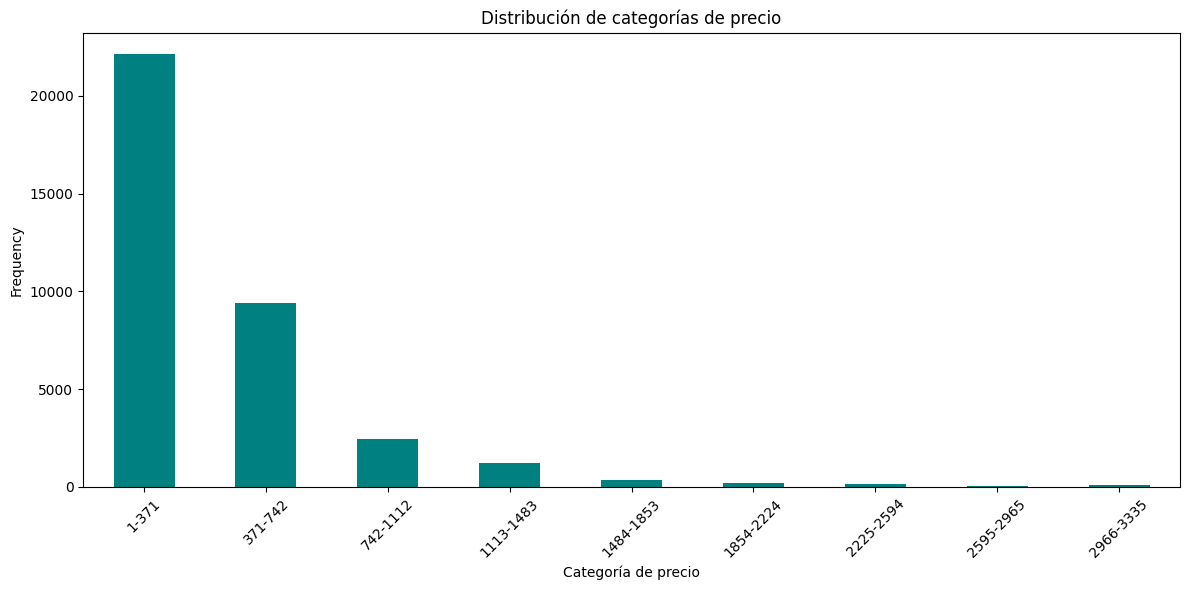

In [146]:

plt.figure(figsize=(12, 6))
tabla7.plot(kind='bar', color='teal')
plt.title('Distribución de categorías de precio')
plt.xlabel('Categoría de precio')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La mayoría de propiedades tiene sus precios menores a 742 dlls

# maximum_nights_avg_ntm

In [147]:
#Limites
max8 = df['prom_max_noches'].max()
min8 = df['prom_max_noches'].min()
limites8 = (min8, max8)
#Rango
rango8 = max8 - min8
#Intervalos de clase "ni"
ni8 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i8 = rango8/ni8
print(limites8)
print(rango8)
print(ni8)
print(i8)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [45]:
#Categorización
intervalos8 = np.linspace((min8-0.001), (max8+0.001), 16)
#Set categorias
categorias8 = ['Menos de 76', 'Menos de 151', 'Menos de 226', 'Menos de 301',
               'Menos de 376', 'Menos de 451',
               'Menos de 526', 'Menos de 600', 'Menos de 675', 'Menos de 750',
               'Menos de 825', 'Menos de 900', 'Menos de 975', 'Menos de 1050','Menos de 1125']
#Agregamos codigo para visualizar los valores redondeados
r8 = np.array(intervalos8)
rr8 = np.round(r8, 0)
np.set_printoptions(suppress=True)
print(rr8)

[   1.   76.  151.  226.  301.  376.  451.  526.  600.  675.  750.  825.
  900.  975. 1050. 1125.]


In [46]:
#Creación de la categoría
df['prom_max_noches'] = pd.cut(x = df['prom_max_noches'],
                              bins=intervalos8, labels=categorias8)
df['prom_max_noches']

,prom_max_noches
0,Menos de 1125
1,Menos de 1125
2,Menos de 76
3,Menos de 750
4,Menos de 1125
...,...
36120,Menos de 151
36121,Menos de 226
36122,Menos de 76
36123,Menos de 376


In [148]:
# Tabla de frecuencias
tabla8 = df['prom_max_noches'].value_counts().sort_index()
display(tabla8)

,count
prom_max_noches,
Menos de 76,6811
Menos de 151,2611
Menos de 226,1471
Menos de 301,719
Menos de 376,10029
Menos de 451,520
Menos de 526,457
Menos de 600,392
Menos de 675,323


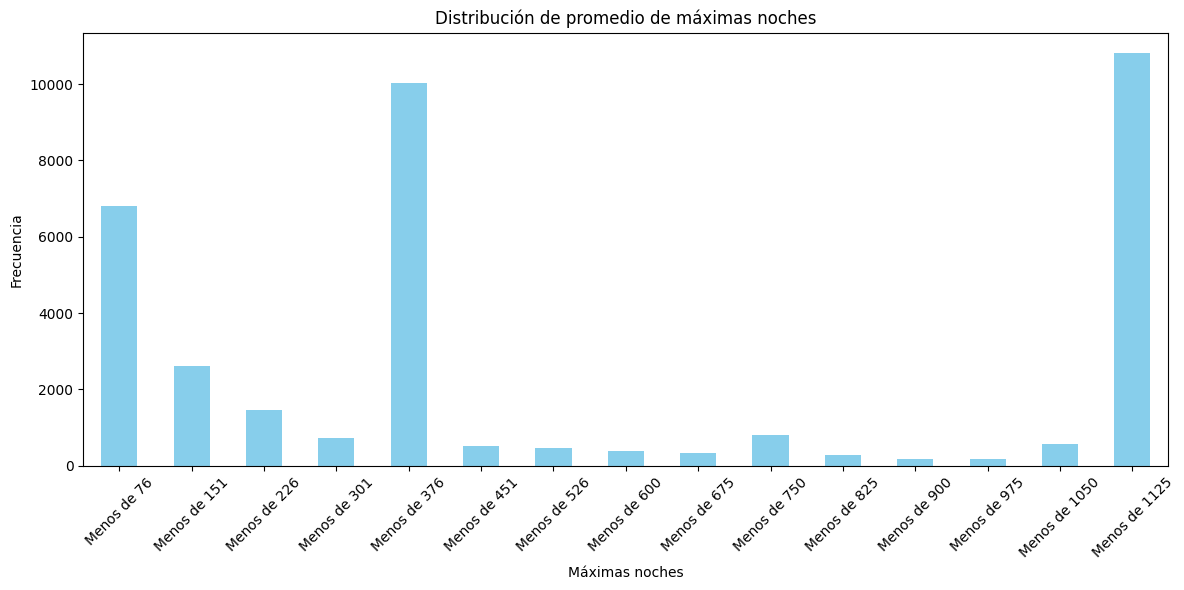

In [150]:

plt.figure(figsize=(12, 6))
tabla8.plot(kind='bar', color='skyblue')
plt.title('Distribución de promedio de máximas noches')
plt.xlabel('Máximas noches')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El promedio de noches máximas con más frecuencia es el de menos de 1125 y mayor a 1050, siguiendo del intervalo de 301 a 376 y en tercer lugar, menos de 76 noches.

#availability_365

In [15]:
#Limites
max9 = df['disponibilidad_365'].max()
min9 = df['disponibilidad_365'].min()
limites9 = (min9, max9)
#Rango
rango9 = max9 - min9
#Intervalos de clase "ni"
ni9 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i9 = rango9/ni9
print(limites9)
print(rango9)
print(ni9)
print(i9)

(0, 365)
365
16.131922081138484
22.625946131165588


In [18]:
#Categorización, en esta ocasión 16 intervalos pueden ser buenos, pero por naturaleza
#de la variable, podemos dividirlo a 12 meses
intervalos9 = np.linspace((min9-0.001), (max9+0.001), 12)
#Set categorias
categorias9 = ['33 días', '66 días', '100', '133 días', '166 días', '199 días',
               '232 días', '265 días', '299 días', '332 días', '365 días']
print(intervalos9.round(0))

[ -0.  33.  66. 100. 133. 166. 199. 232. 265. 299. 332. 365.]


In [19]:
#Creación de la categoría
df['disponibilidad_365'] = pd.cut(x = df['disponibilidad_365'],
                              bins=intervalos9, labels=categorias9)
df['disponibilidad_365']

,disponibilidad_365
0,33 días
1,265 días
2,365 días
3,33 días
4,299 días
...,...
36120,332 días
36121,166 días
36122,100
36123,332 días


In [21]:
# Tabla de frecuencias
tabla9 = df['disponibilidad_365'].value_counts().sort_index()
display(tabla9)

,count
disponibilidad_365,
33 días,6635
66 días,1391
100,2377
133 días,1605
166 días,2103
199 días,2600
232 días,2722
265 días,3529
299 días,4000


# number_of_reviews

In [8]:
#Limites
max10 = df['num_reviews'].max()
min10 = df['num_reviews'].min()
limites10 = (min10, max10)
#Rango
rango10 = max10 - min10
#Intervalos de clase "ni"
ni10 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i10 = rango10/ni10
print(limites10)
print(rango10)
print(ni10)
print(i10)

(0.0, 256.0)
256.0
16.131922081138484
15.869156738570933


In [11]:
#Categorización, para el rango de la variable 16 intervalos pueden no ser adecuados
#ya que subdividen en demasiadas categorías
intervalos10 = np.linspace((min10-0.001), (max10+0.001), 6)
#Set categorias
categorias10 = ['1-51', '51-102',
               '102-154', '154-205', '205-256']
print(intervalos10.round(0))

[ -0.  51. 102. 154. 205. 256.]


In [12]:
#Creación de la categoría
df['num_reviews'] = pd.cut(x = df['num_reviews'],
                              bins=intervalos10, labels=categorias10)
df['num_reviews']

,num_reviews
0,1-51
1,205-256
2,1-51
3,1-51
4,102-154
...,...
36120,1-51
36121,1-51
36122,1-51
36123,1-51


In [14]:
# Tabla de frecuencias
tabla10 = df['num_reviews'].value_counts().sort_index()
display(tabla10)

,count
num_reviews,
1-51,29161
51-102,3760
102-154,1716
154-205,984
205-256,504


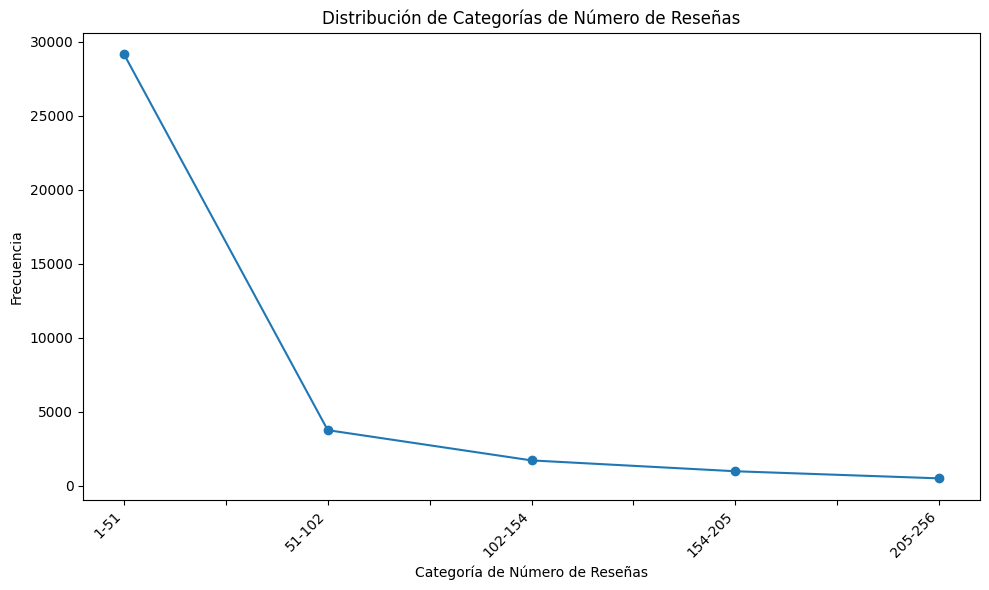

In [168]:

plt.figure(figsize=(10, 6))
tabla10.plot(kind='line', marker='o')
plt.title('Distribución de Categorías de Número de Reseñas')
plt.xlabel('Categoría de Número de Reseñas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se puede observar que la mayoría de propiedades tienen menos de 51 reseñas, siendo pocas las que tienen más de 51

# review_scores_value

In [154]:
#Limites
max11 = df['cal_valor'].max()
min11 = df['cal_valor'].min()
limites11 = (min11, max11)
#Rango
rango11 = max11 - min11
#Intervalos de clase "ni"
ni11 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i11 = rango11/ni11
print(limites11)
print(rango11)
print(ni11)
print(i11)

(0.0, 5.0)
5.0
16.131922081138484
0.30994446755021354


In [155]:
#Categorización
intervalos11 = np.linspace((min11-0.001), (max11+0.001), 4)
#Set categorias
categorias11 = ['Calificación baja', 'Calificación media', 'Calificación alta']
print(intervalos11.round(0))

[-0.  2.  3.  5.]


In [156]:
#Creación de la categoría
df['cal_valor'] = pd.cut(x = df['cal_valor'],
                              bins=intervalos11, labels=categorias11)
df['cal_valor']

,cal_valor
0,Calificación alta
1,Calificación alta
2,Calificación baja
3,Calificación baja
4,Calificación alta
...,...
36120,Calificación baja
36121,Calificación baja
36122,Calificación baja
36123,Calificación baja


In [157]:
# Tabla de frecuencias
tabla11 = df['cal_valor'].value_counts().sort_index()
display(tabla11)

,count
cal_valor,
Calificación baja,8124
Calificación media,397
Calificación alta,27604


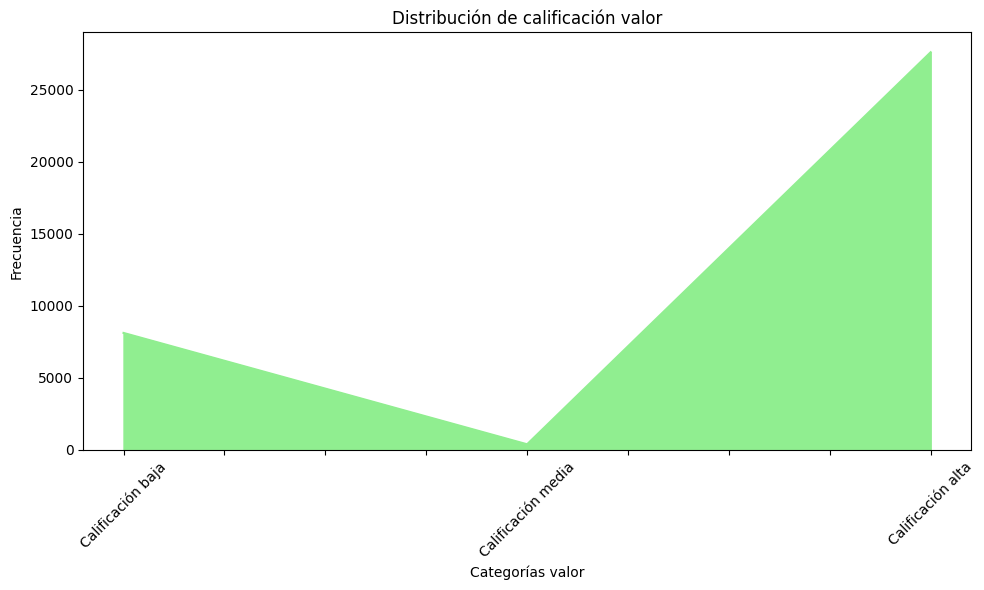

In [159]:

plt.figure(figsize=(10, 6))
tabla11.plot(kind='area', color='lightgreen')
plt.title('Distribución de calificación valor')
plt.xlabel('Categorías valor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hay más propiedades con calificación alta y baja que media.

# reviews_per_month

In [161]:
#Limites
max12 = df['reviews_mes'].max()
min12 = df['reviews_mes'].min()
limites12 = (min12, max12)
#Rango
rango12 = max12 - min12
#Intervalos de clase "ni"
ni12 = 1+3.32*np.log10(n_observaciones)
#Ancho de intervalos
i12 = rango12/ni12
print(limites12)
print(rango12)
print(ni12)
print(i12)

(0, 36)
36
16.131922081138484
2.2316001663615372


In [162]:
#Categorización, para este caso, 16 intervalos son muchos, por ello los
#establecemos de acuerdo al tipo de variable
intervalos12 = np.linspace((min12-0.001), (max12+0.001), 6)
#Set categorias
categorias12 = ['Muy pocas reviews','Pocas reviews', 'Reviews moderadas', 'Reviews buenas', 'Reviews excelentes']
print(intervalos12.round(0))

[-0.  7. 14. 22. 29. 36.]


In [163]:
#Creación de la categoría
df['reviews_mes'] = pd.cut(x = df['reviews_mes'],
                              bins=intervalos12, labels=categorias12)
df['reviews_mes']

,reviews_mes
0,Muy pocas reviews
1,Muy pocas reviews
2,Muy pocas reviews
3,Muy pocas reviews
4,Muy pocas reviews
...,...
36120,Muy pocas reviews
36121,Muy pocas reviews
36122,Muy pocas reviews
36123,Muy pocas reviews


In [164]:
# Tabla de frecuencias
tabla12 = df['reviews_mes'].value_counts().sort_index()
display(tabla12)

,count
reviews_mes,
Muy pocas reviews,36057
Pocas reviews,61
Reviews moderadas,5
Reviews buenas,1
Reviews excelentes,1


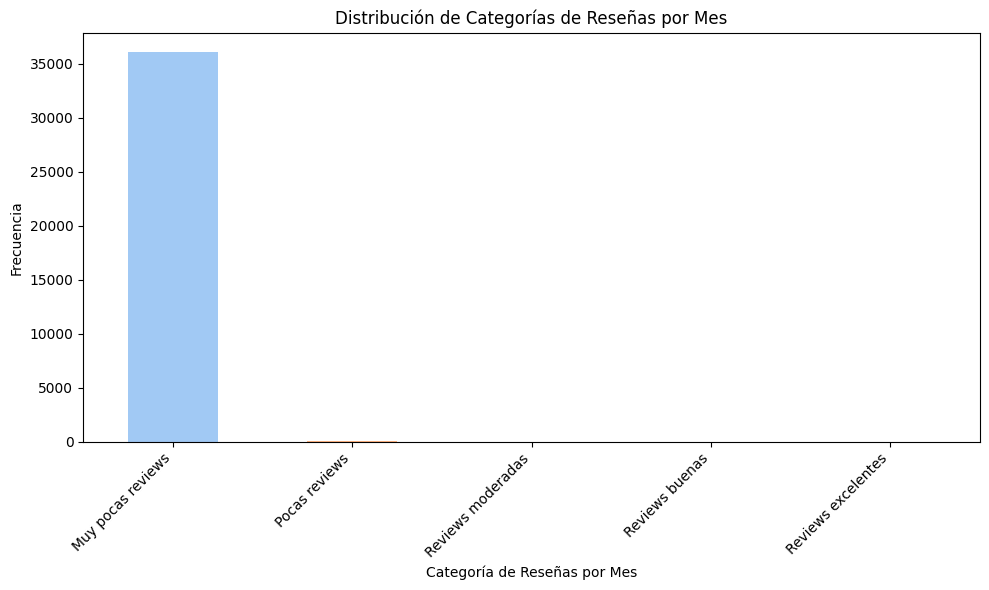

In [166]:

plt.figure(figsize=(10, 6))
tabla12.plot(kind='bar', color=sns.color_palette('pastel', len(tabla12)))
plt.title('Distribución de Categorías de Reseñas por Mes')
plt.xlabel('Categoría de Reseñas por Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Ya que la categoría que se muestra es de menores a 7 reviews al mes, esta podría ser desglosada más, mientras que otros valores pueden ser agrupados por ser muy pocos, pero se tiene que considerar una distribución anormal